In [25]:
import matplotlib.pyplot as pyplot
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 
import scipy
import scipy.stats as sps
import numpy as np

In [2]:
%matplotlib inline

### 1

In [3]:
N = 500

In [22]:
X = np.arange(N)/25
Y = 0.5*X + 1 + sps.norm.rvs(size=N,scale=0.2**0.5)

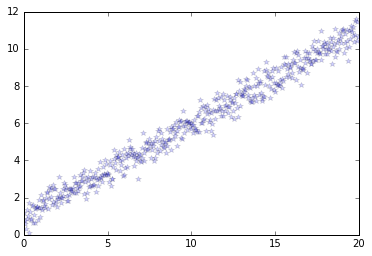

In [23]:
pyplot.plot(X,Y,'*',alpha=0.2)

### 2

In [98]:
def opt_mse_X(arg):
    return metrics.mean_squared_error(arg[0]*X+arg[1], Y)
def opt_mae_X(arg):
    return metrics.mean_absolute_error(arg[0]*X+arg[1], Y)

In [94]:
argmin = scipy.optimize.minimize(opt_mse_X,x0=[0,0])
print(argmin)
k_mse,b_mse = argmin.x

      fun: 0.20140760607741406
 hess_inv: array([[ 0.01500006, -0.1497006 ],
       [-0.1497006 ,  1.99401205]])
      jac: array([  2.04890966e-08,   1.86264515e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49830097,  0.98639259])


In [99]:
argmin = scipy.optimize.minimize(opt_mae_X,x0=[0,0])
print(argmin)
k_mae,b_mae = argmin.x

      fun: 0.36528565986731104
 hess_inv: array([[  6.06564482e-05,  -1.90913119e-04],
       [ -1.90913119e-04,   6.14840337e-04]])
      jac: array([ 0.00528,  0.     ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 376
      nit: 13
     njev: 92
   status: 2
  success: False
        x: array([ 0.5011843 ,  0.97614928])


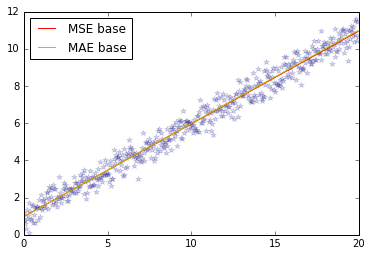

In [102]:
pyplot.plot(X,Y,'*',alpha=0.2)
pyplot.plot(X,k_mse*X+b_mse,'r-',label='MSE base')
pyplot.plot(X,k_mae*X+b_mae,'y-',label='MAE base')
pyplot.legend(loc='best')

### 3

In [68]:
x = [X[i*6] for i in range(75)]
y = list(-1 +  sps.norm.rvs(size=75,scale=0.2**0.5))

In [75]:
X_osc = list(X)
X_osc.extend(x)
Y_osc = list(Y)
Y_osc.extend(y)
X_osc = np.array(X_osc)
Y_osc = np.array(Y_osc)

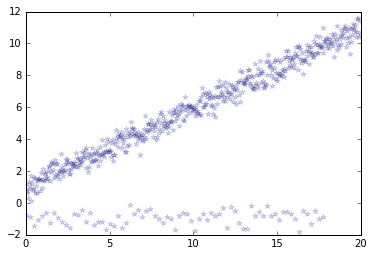

In [76]:
pyplot.plot(X_osc,Y_osc,'*',alpha=0.2)

In [77]:
def opt_mse_X_osc(arg):
    return metrics.mean_squared_error(arg[0]*X_osc+arg[1], Y_osc)

def opt_mae_X_osc(arg):
    return metrics.mean_absolute_error(arg[0]*X_osc+arg[1], Y_osc)

In [103]:
argmin = scipy.optimize.minimize(opt_mse_X_osc,x0=[0,0])
print(argmin)
k_mse_osc,b_mse_osc = argmin.x

      fun: 5.5578836657484265
 hess_inv: array([[ 0.01531687, -0.15066475],
       [-0.15066475,  1.98201719]])
      jac: array([ -5.96046448e-08,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.47026666,  0.43507399])


In [104]:
argmin = scipy.optimize.minimize(opt_mae_X_osc,x0=[0,0])
print(argmin)
k_mae_osc,b_mae_osc = argmin.x

      fun: 1.1396898092386334
 hess_inv: array([[ 0.09168722, -0.15674549],
       [-0.15674549,  1.48647351]])
      jac: array([ 0.00716062, -0.00173913])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 176
      nit: 7
     njev: 41
   status: 2
  success: False
        x: array([ 0.49918631,  0.87567224])


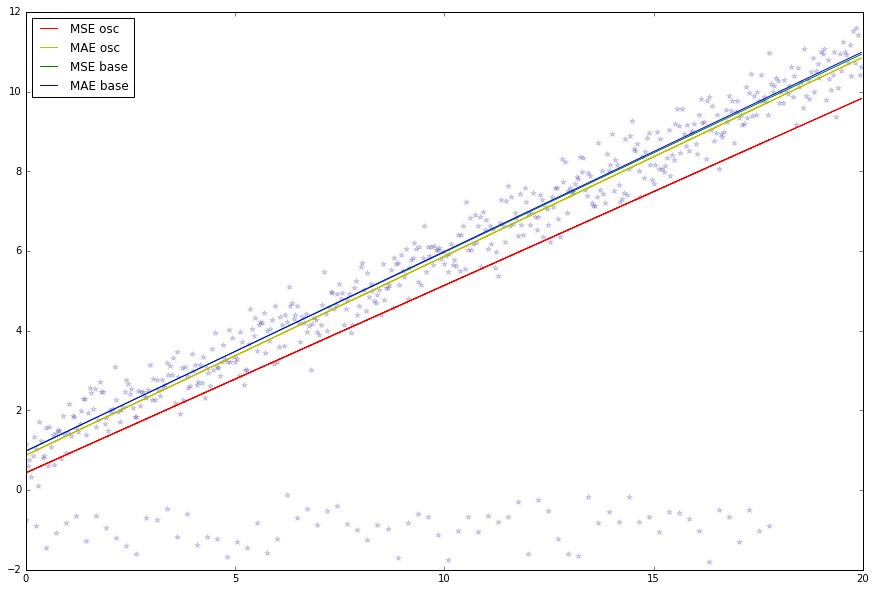

In [105]:
pyplot.figure(figsize=(15,10))
pyplot.plot(X_osc,Y_osc,'*',alpha=0.2)
pyplot.plot(X_osc,k_mse_osc*X_osc+b_mse_osc,'r-',label='MSE osc')
pyplot.plot(X_osc,k_mae_osc*X_osc+b_mae_osc,'y-',label='MAE osc')
pyplot.plot(X,k_mse*X+b_mse,'g-',label='MSE base')
pyplot.plot(X,k_mae*X+b_mae,'b-',label='MAE base')
pyplot.legend(loc='best')

## 4

Из теории знаем, что MAE оценивает медиану распределения, которая слабо сместилась при добавлении новых 75 точек.Это видно на графике: оценка MAE не сильно отличается от оценкок MSE и MAE, полученных в случае без выбросов.

Также из графика видно, что MSE сильнее реагирует на выбросы, так как за них больший штраф.